In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import xarray
import time
import matplotlib.patches as patches
import glob

import matplotlib.colors as mcolors

from netCDF4 import Dataset
from scipy import stats

from wrf import getvar,vinterp

from matplotlib.animation import FuncAnimation


## estimate of pressure levels from the hybrid coordinate:
## lev0=975, 5=925, 8=850, 12=700, 17=500,  19=400, 21=300, 24=200, 29=100

### First, load the lats, lons, and levs used for plotting later.

In [2]:
### Plot the height vs. time sections of potential temperature
path = '/ocean/projects/ees210014p/xjliu/Amazon_exp/'
file = path+'Amazon_NoahMP_ILdeforested/wrfout_d01_2015-11-01_00:00:00'
with xarray.open_dataset(file,decode_times=False,
                         mask_and_scale='True') as ds1:
    lats=ds1['XLAT'][0,:,0]
    lons=ds1['XLONG'][0,0,:]
    lu1=ds1['LU_INDEX'][0,:,:]
    pb = ds1['PB'][0,:,:,:]

### Check whether LUindex is changed correctly

In [3]:
file0 = path+'Amazon_NoahMP/energyflux_d01_2015-11-01_00:00:00'
with xarray.open_dataset(file0,decode_times=False,
                         mask_and_scale='True') as ds0:
    lu0=ds0['LU_INDEX'][0,:,:]

file1 = path+'Amazon_NoahMP_ILdeforested/energyflux_d01_2015-11-01_00:00:00'
with xarray.open_dataset(file1,decode_times=False,
                         mask_and_scale='True') as ds1:
    lu1=ds1['LU_INDEX'][0,:,:]

<ipython-input-28-b67a48b6f987>:24: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im1=axes[1].pcolormesh(lons,lats,T_vint1[3,:,:]-T_vint0[3,:,:],vmax=2.0,vmin=-2.0,cmap='bwr')


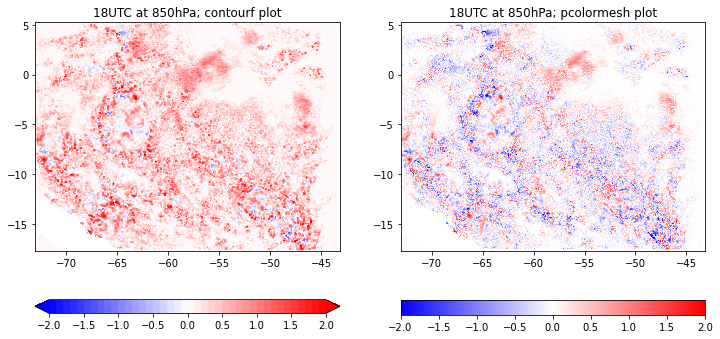

In [28]:
fig,axes = plt.subplots(1,2,figsize=(12,6),sharex=True)
axes = axes.ravel()  

int_levels=[1000,975,925,850,700,600,500,400,300,200,100]
hours=['00','01','02','03','06','07','08','09','10','12','13','14','15','16','17','18','19','20','21','22','23']

for ii in range(15,16):
    dif_lu = lu1-lu0
    #ncfile0 = Dataset(path+'Amazon_NoahMP/3Dfields_d01_2015-11-01_'+hours[ii]+':00:00')
    # Get the Sea Level Pressure
    #theta0 = getvar(ncfile0, "theta")
    #T_vint0 = vinterp(ncfile0,theta0,"pressure",int_levels)

    #ncfile1 = Dataset(path+'Amazon_NoahMP_ILdeforested/3Dfields_d01_2015-11-01_'+hours[ii]+':00:00')
    #theta1 = getvar(ncfile1, "theta")
    #T_vint1 = vinterp(ncfile1,theta1,"pressure",int_levels)

    im=axes[0].contourf(lons,lats,T_vint1[3,:,:]-T_vint0[3,:,:],cmap='bwr',
                         levels=np.arange(-2,2.01,0.1),
                     extend='both')
    #axes[0].contour(lons,lats,dif_lu,colors='k',levels=[0])
    axes[0].set_title(str(hours[ii])+'UTC at 850hPa; contourf plot')
    
    im1=axes[1].pcolormesh(lons,lats,T_vint1[3,:,:]-T_vint0[3,:,:],vmax=2.0,vmin=-2.0,cmap='bwr')
    #axes[1].contour(lons,lats,dif_lu,colors='k',levels=[0])
    axes[1].set_title(str(hours[ii])+'UTC at 850hPa; pcolormesh plot')
    
fig.colorbar(im,ax=axes[0],orientation='horizontal')
fig.colorbar(im1,ax=axes[1],orientation='horizontal')
#fig.suptitle('Hour= '+hour+'UTC')



In [9]:
dif_T = T_vint1[3,:,:]-T_vint0[3,:,:]
np.nanmean(dif_T)

0.01851948

In [12]:
ngrids = sum(sum(np.isnan(dif_T)==False))

In [14]:
difT_1D = dif_T.values.flatten()
difT_nonnan = difT_1D[np.isnan(difT_1D)==False]
num,value = np.histogram(difT_nonnan,bins=30,range=[-2,2])

Text(0, 0.5, 'Fraction of grids')

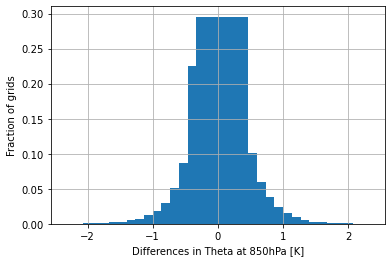

In [30]:
plt.bar((value[:-1]+value[1:])/2,num/ngrids.values)
plt.grid()
plt.xlabel('Differences in Theta at 850hPa [K]')
plt.ylabel('Fraction of grids')

In [59]:
sum((value[:-1]+value[1:])/2*num)/ngrids.values

0.020638077271316738

In [50]:
value.shape

(11,)